In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import os
import numpy as np
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.layers import Masking

Using TensorFlow backend.
C:\Users\silva\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\silva\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\silva\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\silva\AppData\Roa

In [2]:
def scale(training_set):
    # Feature Scaling
    sc = MinMaxScaler(feature_range = (0, 1))
    training_set_scaled = sc.fit_transform(training_set)
    # Creating a data structure with 10 time-steps and 1 output
    X_train = []
    y_train = []
    for i in range(10, training_set.shape[0]):
        X_train.append(training_set_scaled[i-10:i, 0])
        y_train.append(training_set_scaled[i, 0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    return X_train, y_train, sc

In [3]:
def train_LSTM(X_train, y_train):
    model = Sequential()
    model.add(Masking(mask_value=-1, input_shape = (X_train.shape[1], 1)))
    #Adding the first LSTM layer and some Dropout regularisation
    model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    # Adding a second LSTM layer and some Dropout regularisation
    model.add(LSTM(units = 50, return_sequences = True))
    model.add(Dropout(0.2))
    # Adding a third LSTM layer and some Dropout regularisation
    model.add(LSTM(units = 50, return_sequences = True))
    model.add(Dropout(0.2))
    # Adding a fourth LSTM layer and some Dropout regularisation
    model.add(LSTM(units = 50))
    model.add(Dropout(0.2))
    # Adding the output layer
    model.add(Dense(units = 1))

    # Compiling the RNN
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')

    # Fitting the RNN to the Training set
    model.fit(X_train, y_train, epochs = 100, batch_size = 32)
    return model

In [4]:
def predict(dataset_train, dataset_test, model, sc):
    dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
    inputs = dataset_total[len(dataset_total) - dataset_test.shape[0] - 10:].values
    inputs = inputs.reshape(-1,1)
    inputs = sc.transform(inputs)
    X_test = []
    for i in range(10, inputs.shape[0]):
        X_test.append(inputs[i-10:i, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    print(X_test.shape)
    # (273, 60, 1)
    predicted_stock_price = model.predict(X_test)
    predicted_stock_price = sc.inverse_transform(predicted_stock_price)
    return X_test, predicted_stock_price

In [5]:
def plot_results(dataset_test, predicted_stock_price):
    # Visualising the results
    plt.plot(dataset_test.values, color = 'red', label = 'Real')
    plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted')
    plt.xticks(np.arange(0,dataset_test.shape[0],50))
    plt.xlabel('Time')
    plt.ylabel('Index')
    plt.legend()
    plt.show()

In [6]:
def impute_with_prediction(df_orig, df_imputed):
    for i in df_orig.index:
        if pd.isna(df_orig.loc[i]):
            df_orig.at[i] = df_imputed.loc[i]
    return df_orig

In [7]:
INPUT = 'output/\CompleteWeeklyIndexes'
df = pd.read_csv(INPUT+'.csv', parse_dates=True, index_col=0)

Epoch 1/100
772/772 [==============================] - 7s 10ms/step - loss: 0.0566
Epoch 2/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0093A: 0s - loss: 0.00
Epoch 3/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0050
Epoch 4/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0054
Epoch 5/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0038
Epoch 6/100
772/772 [==============================] - 1s 2ms/step - loss: 0.0049
Epoch 7/100
772/772 [==============================] - 1s 2ms/step - loss: 0.0043
Epoch 8/100
772/772 [==============================] - 1s 2ms/step - loss: 0.0041
Epoch 9/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0050
Epoch 10/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0046
Epoch 11/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0037
Epoch 12/100
772/772 [==============================] - 2s 2ms/step - loss: 0

772/772 [==============================] - 1s 2ms/step - loss: 0.0017
Epoch 99/100
772/772 [==============================] - 1s 2ms/step - loss: 0.0015
Epoch 100/100
772/772 [==============================] - 1s 2ms/step - loss: 0.0014


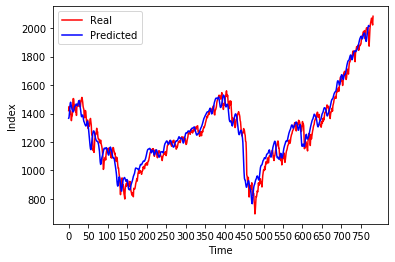

(273, 10, 1)


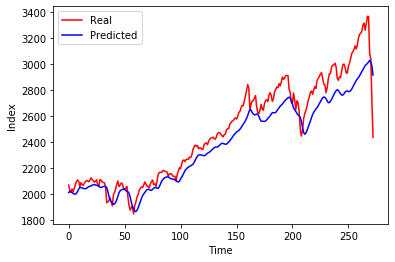

Epoch 1/100
772/772 [==============================] - 8s 10ms/step - loss: 0.0379
Epoch 2/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0094
Epoch 3/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0074
Epoch 4/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0070
Epoch 5/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0069
Epoch 6/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0064
Epoch 7/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0076
Epoch 8/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0069
Epoch 9/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0066
Epoch 10/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0067
Epoch 11/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0063
Epoch 12/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0065
Epoch 13/100

772/772 [==============================] - 1s 2ms/step - loss: 0.0046A
Epoch 99/100
772/772 [==============================] - 1s 2ms/step - loss: 0.0045
Epoch 100/100
772/772 [==============================] - 1s 2ms/step - loss: 0.0044


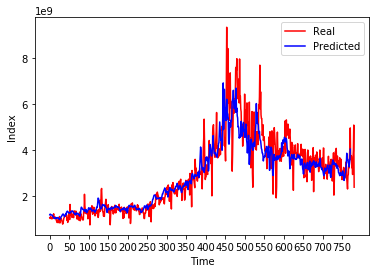

(273, 10, 1)


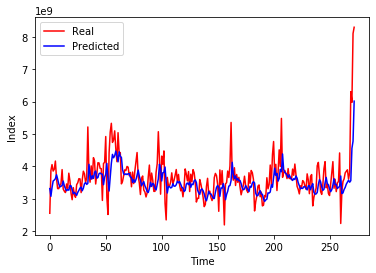

Epoch 1/100
772/772 [==============================] - 8s 10ms/step - loss: 0.0202
Epoch 2/100
772/772 [==============================] - 1s 1ms/step - loss: 0.0098
Epoch 3/100
772/772 [==============================] - 1s 1ms/step - loss: 0.0086
Epoch 4/100
772/772 [==============================] - 1s 1ms/step - loss: 0.0082
Epoch 5/100
772/772 [==============================] - 1s 2ms/step - loss: 0.0080
Epoch 6/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0078A: 0s - loss: 0.007
Epoch 7/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0074
Epoch 8/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0074
Epoch 9/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0063
Epoch 10/100
772/772 [==============================] - 1s 2ms/step - loss: 0.0060
Epoch 11/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0054
Epoch 12/100
772/772 [==============================] - 1s 2ms/step - loss: 

In [ ]:
df_train_complete = None
df_test_complete = None
for col in df.columns:
    test_set = df.loc['2015-01-02':, col].fillna(-1).values #Selecting test data
    training_set = df.loc['2000-01-01':'2015-01-01', col].fillna(-1).values #Selecting training data
    training_set = training_set.reshape(-1, 1)
    X_train, y_train, sc = scale(training_set)
    model = train_LSTM(X_train, y_train)
    # Dados de treinamento
    predicted_stock_price_train = model.predict(X_train)
    predicted_stock_price_train = sc.inverse_transform(predicted_stock_price_train)
    plot_results(df.loc['2000-01-01':'2015-01-01', col].fillna(-1), predicted_stock_price_train)
    # Dados de teste
    X_test, predicted_stock_price = predict(df.loc['2000-01-01':'2015-01-01', col].fillna(-1), df.loc['2015-01-02':, col].fillna(-1), model, sc)
    plot_results(df.loc['2015-01-02':, col].fillna(-1), predicted_stock_price)
    
    vazio = np.empty(10)
    predicted_stock_price_train = np.append(vazio, predicted_stock_price_train)
    series_complete_train = impute_with_prediction(df.loc['2000-01-01':'2015-01-01', col], pd.DataFrame(index=df.loc['2000-01-01':'2015-01-01', col].index, data=predicted_stock_price_train))
    df_train_complete = pd.concat([df_train_complete, pd.DataFrame(index=df.loc['2000-01-01':'2015-01-01', col].index, data=series_complete_train, columns=[col])], axis=1, join='outer')
    df_test_complete = pd.concat([df_test_complete, pd.DataFrame(data=predicted_stock_price, index = df.loc['2015-01-02':, col].index, columns = [col])], axis=1, join='outer')

In [ ]:
df_train_complete.to_csv(r'output\/CompleteIndexesWeeklyTrainLSTM.csv', index = True)
df_test_complete.to_csv(r'output\/CompleteIndexesWeeklyTestLSTM.csv', index = True)

In [ ]:
df_train_complete

In [ ]:
df_train_complete.shape

In [ ]:
df_test_complete.head()

In [ ]:
df_test_complete.shape

In [ ]:
df